In [4]:
# !pip install seaborn

In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data_path = 'aug_train.csv'

In [7]:
train = pd.read_csv(os.path.join(data_path, 'aug_train.csv'))

In [8]:
train.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [9]:
# Data exploration to get a feel of the data

In [10]:
train.info() #this gives a summary containing the column names, Data types and non-nul count (The number of rows with actual data per column)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [11]:
# Immediately we notice that the target variable is noted as a float, but it is a classification problem, so it will work best as 'object

In [12]:
train.describe()
# This is a statistical summary of the numerical values, that gives an Idea of the distribution of the data

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [13]:
#For effective exploration, we need to inspect the data for missing values and duplicates. Those tend to get in the way of our analysis.

In [14]:
train.isnull().sum()# This returns the count of missing values per column.

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<Axes: >

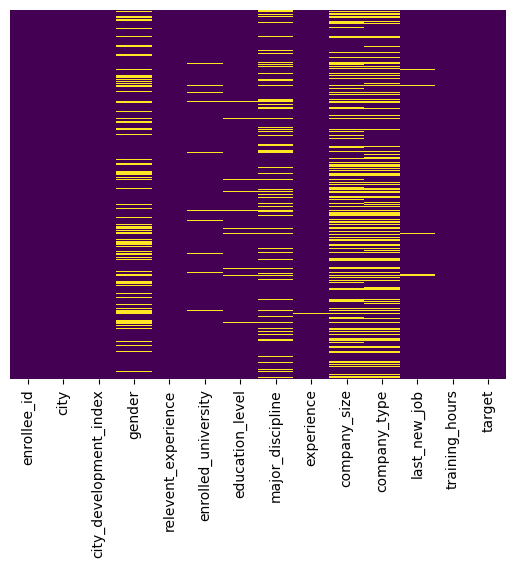

In [15]:
#missing data heatmap. This shows the relative missingness in the dataset
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
## Ways to deal with missing values:
#- Drop the missing values - When the resulting dataset will still be significant enough to draw insigts from
#- Impute the missing values - To fill the missing data using the most relavant methods so as not to skew the resulting insights

In [17]:
#lets try dropping, to see the effect on the size of dataset.
train_drop = train.copy()

In [18]:
print(train_drop.shape)
train_drop.dropna(inplace=True)
print(train_drop.shape)

(19158, 14)
(8955, 14)


In [19]:
#Dropping all missing values reduces the number of instances from 19158 to 8955, so Its not the best approach.


In [20]:
#Dropping missing values for the columns with under 1000 missing values, then imputing the rest, can be a better approach

In [21]:
cols_drop_missing = train.columns[train.isnull().sum() < 1000] # Also includes columns with no missing values, in which there will be no effect.
cols_impute_missing = train.columns[train.isnull().sum() > 1000]
print(cols_drop_missing)
print(cols_impute_missing)

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')
Index(['gender', 'major_discipline', 'company_size', 'company_type'], dtype='object')


In [22]:
#drop missing values in cols_drop_missing
for col in cols_drop_missing:
  train[col].dropna(inplace=True)


In [23]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [24]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [25]:
train_impute_missing = train[cols_impute_missing].copy()
train_impute_missing.info()
# A more specific info call for us to inspect data types of these column more closely, since filling strategies vary with data type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            14650 non-null  object
 1   major_discipline  16345 non-null  object
 2   company_size      13220 non-null  object
 3   company_type      13018 non-null  object
dtypes: object(4)
memory usage: 598.8+ KB


In [26]:
#Since they are all 'object' data type, we will fill with mode
for col in cols_impute_missing:
  train_impute_missing[col].fillna(train_impute_missing[col].mode()[0], inplace=True)

/tmp/ipykernel_663630/2609269563.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_impute_missing[col].fillna(train_impute_missing[col].mode()[0], inplace=True)


In [27]:
#With all missing values filled lets merge the data back together
train_impute_missing.isnull().sum()

gender              0
major_discipline    0
company_size        0
company_type        0
dtype: int64

In [28]:
train.shape, train_impute_missing.shape

((19158, 14), (19158, 4))

In [29]:
train.drop(cols_impute_missing, axis=1, inplace=True)

In [30]:
#merge train and train_impute missing
train = pd.concat([train, train_impute_missing], axis=1)

In [31]:
train.shape

(19158, 14)

In [32]:
train.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
relevent_experience         0
enrolled_university       386
education_level           460
experience                 65
last_new_job              423
training_hours              0
target                      0
gender                      0
major_discipline            0
company_size                0
company_type                0
dtype: int64

In [33]:
drop_cols_list = ['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [34]:
train.dropna(inplace=True)# now we drop the remaining columns

In [35]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
relevent_experience       0
enrolled_university       0
education_level           0
experience                0
last_new_job              0
training_hours            0
target                    0
gender                    0
major_discipline          0
company_size              0
company_type              0
dtype: int64

In [36]:
train.shape

(18014, 14)

In [37]:
# Drop duplicates
train.drop_duplicates(inplace=True)

In [38]:
train.shape

(18014, 14)

In [39]:
# It appears there were no duplicates



```
# This is formatted as code
```

## Univariate analysis

In [40]:
# various plots showing the distribution of one column at a time
train.head()


,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,gender,major_discipline,company_size,company_type
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0,Male,STEM,50-99,Pvt Ltd
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0,Male,STEM,50-99,Pvt Ltd
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0,Male,STEM,50-99,Pvt Ltd
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0,Male,STEM,50-99,Funded Startup
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0,Male,STEM,50-99,Pvt Ltd


<Axes: xlabel='experience', ylabel='Count'>

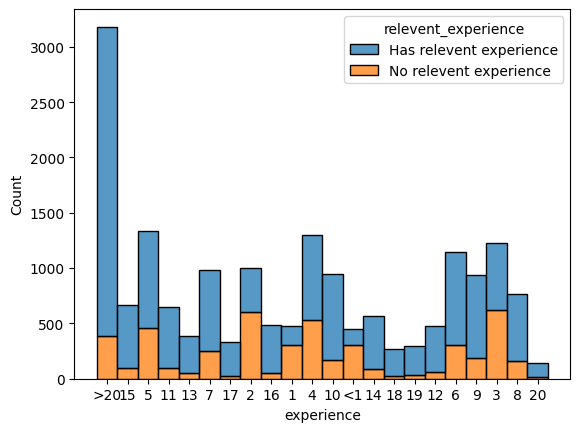

In [41]:
# @title Experience distribution by relevant experience

sns.histplot(data=train, x='experience', hue='relevent_experience', multiple='stack')

<Axes: xlabel='target', ylabel='count'>

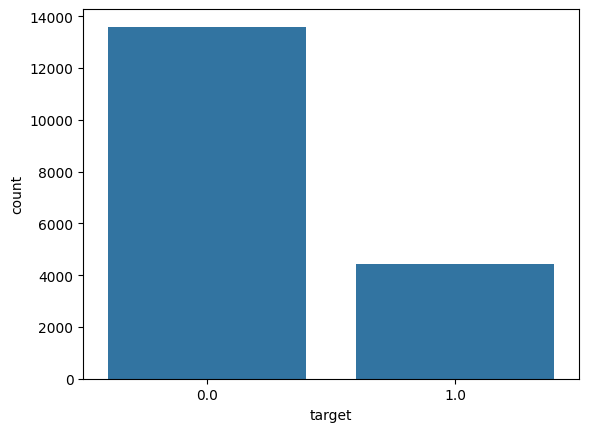

In [42]:
#plot with taget lables
sns.countplot(x = 'target', data = train)
# The resulting pllot shows most people don't stay after training. Lets keep exploring.

<Axes: xlabel='company_size'>

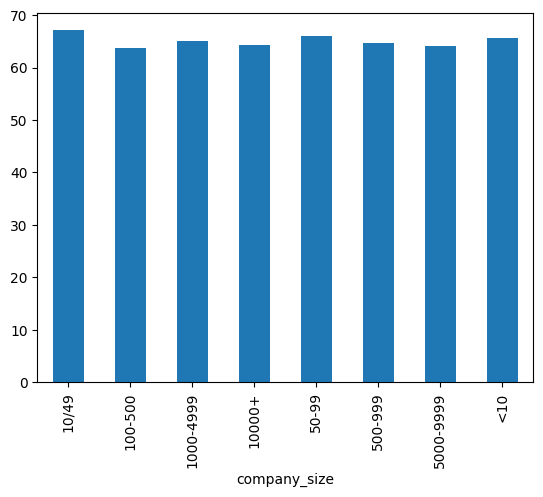

In [43]:
train.groupby('company_size')['training_hours'].mean().plot(kind='bar')

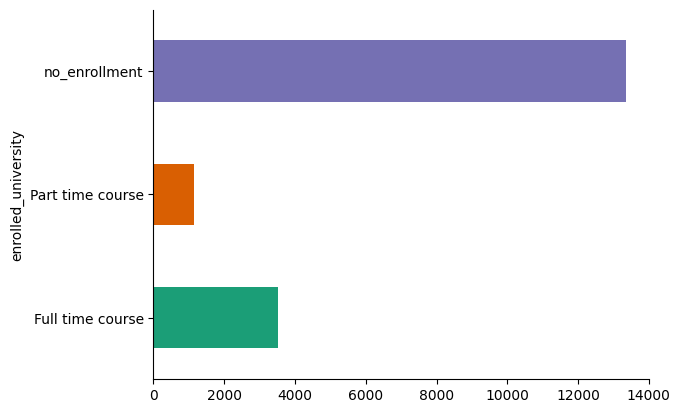

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('enrolled_university').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

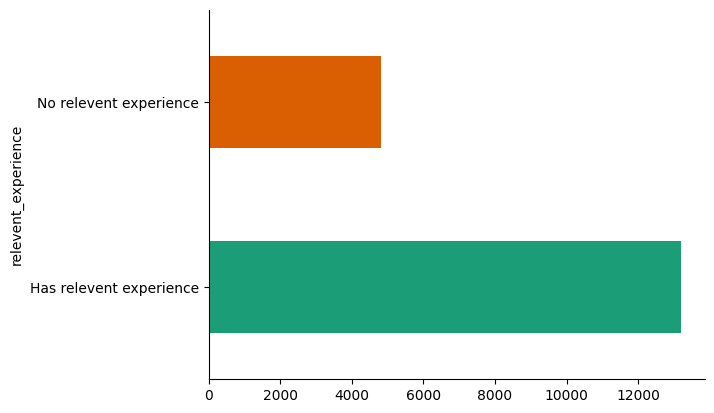

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns
train.groupby('relevent_experience').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

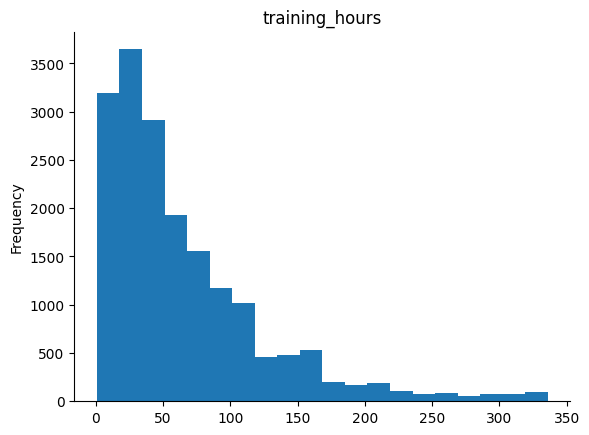

In [46]:
#training_hours

from matplotlib import pyplot as plt
train['training_hours'].plot(kind='hist', bins=20, title='training_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='gender', ylabel='count'>

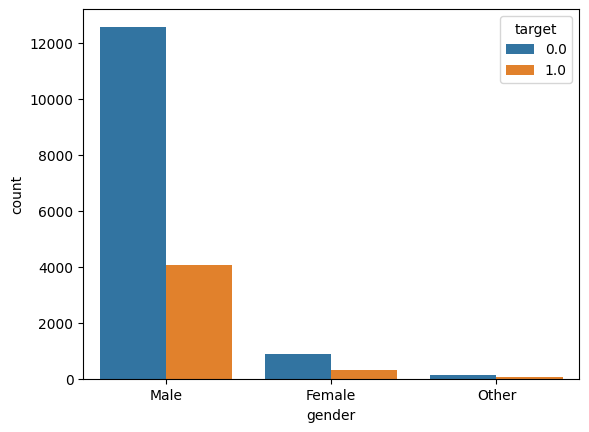

In [47]:
# plot target vs gender
sns.countplot(x='gender', hue='target', data=train)

In [48]:
plot_vs_target_list = ['gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'training_hours']


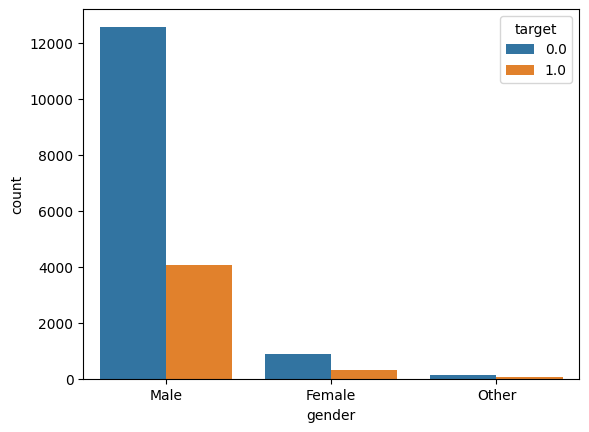

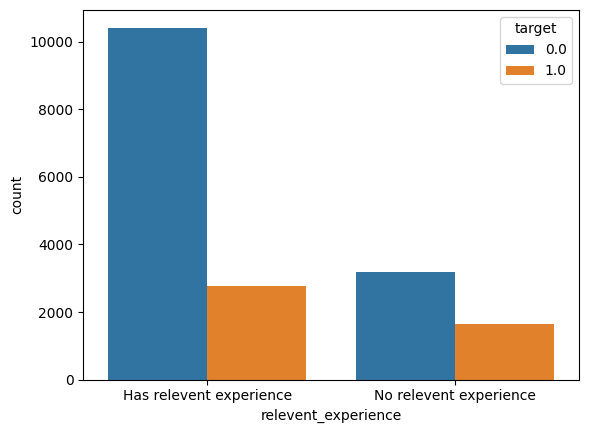

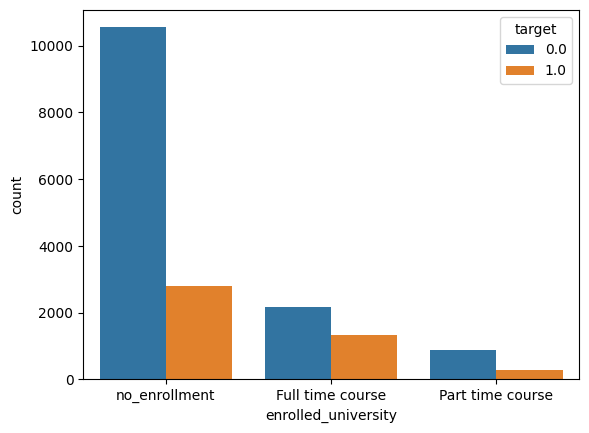

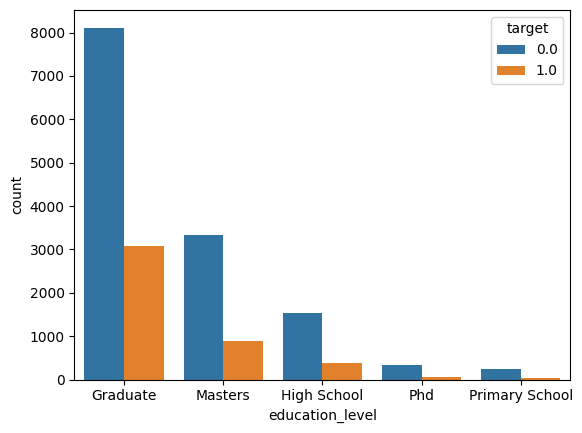

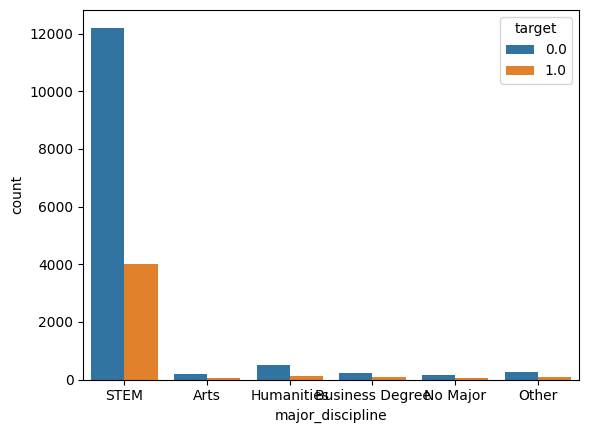

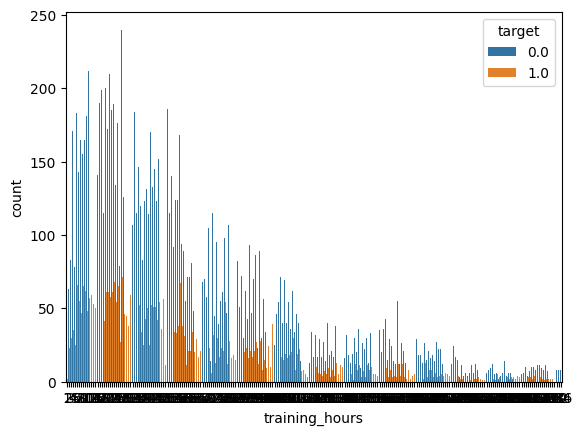

In [49]:
for i in plot_vs_target_list:
  sns.countplot(x=i, hue='target', data=train)
  plt.show()

In [50]:
# @markdown ## Model Selection

In [51]:
## To prepare the data for the model, There are some steps to be taken.
# 1. Any text data has to be encoded to numeric type, because models work with numbers
# 2. Data with high variations, have to be scaled or normalized so as to optimize the model.

In [52]:
train.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,gender,major_discipline,company_size,company_type
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0,Male,STEM,50-99,Pvt Ltd
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0,Male,STEM,50-99,Pvt Ltd
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0,Male,STEM,50-99,Pvt Ltd
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0,Male,STEM,50-99,Funded Startup
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0,Male,STEM,50-99,Pvt Ltd


In [53]:
for col in train.columns:
  print(train[col].value_counts()) # This part of the code shows the unique values of each column and the number of instances.
  #This can help identify which columns to encode and which ones to scale.

enrollee_id
8949     1
5094     1
23119    1
29385    1
14546    1
        ..
29471    1
18051    1
32067    1
11547    1
23834    1
Name: count, Length: 18014, dtype: int64
city
city_103    4194
city_21     2454
city_16     1471
city_114    1254
city_160     817
            ... 
city_111       3
city_129       2
city_8         2
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64
city_development_index
0.920    5011
0.624    2454
0.910    1471
0.926    1254
0.698     593
         ... 
0.693       3
0.649       3
0.781       3
0.625       2
0.664       1
Name: count, Length: 93, dtype: int64
relevent_experience
Has relevent experience    13190
No relevent experience      4824
Name: count, dtype: int64
enrolled_university
no_enrollment       13348
Full time course     3517
Part time course     1149
Name: count, dtype: int64
education_level
Graduate          11188
Masters            4228
High School        1908
Phd                 399
Primary School      291
Name: co

In [54]:
text_cols_to_encode = [col for col in train.columns if train[col].dtype == 'object']
#another way to know which columns to encode is using data types. Ussualy 'Object' data types (categorical) are encoded,
#while the numerical data types are scaled.

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in text_cols_to_encode:
  train[col] = le.fit_transform(train[col])

In [56]:
train.head()
#All the categorical columns have been encoded.

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,gender,major_discipline,company_size,company_type
0,8949,5,0.920,0,2,0,21,0,36,1.0,1,5,4,5
1,29725,77,0.776,1,2,0,6,4,47,0.0,1,5,4,5
2,11561,64,0.624,1,0,0,15,5,83,0.0,1,5,4,5
4,666,50,0.767,0,2,2,21,3,8,0.0,1,5,4,1
5,21651,57,0.764,0,1,0,2,0,24,1.0,1,5,4,5


In [57]:
# Now we need to scale the data.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

train_scaled = pd.DataFrame(scaler.fit_transform(train))
train_scaled.columns = train.columns

In [58]:
train_scaled.head()

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target,gender,major_discipline,company_size,company_type
0,-0.823017,-1.095965,0.722878,-0.604757,0.568541,-0.705141,1.219046,-0.913856,-0.488663,1.753466,0.211859,0.302358,0.367775,0.397819
1,1.326530,0.927917,-0.456367,1.653555,0.568541,-0.705141,-1.044332,1.169044,-0.305505,-0.570299,0.211859,0.302358,0.367775,0.397819
2,-0.552772,0.562494,-1.701127,1.653555,-1.934625,-0.705141,0.313695,1.689769,0.293920,-0.570299,0.211859,0.302358,0.367775,0.397819
3,-1.680001,0.168961,-0.530070,-0.604757,0.568541,1.291309,1.219046,0.648319,-0.954882,-0.570299,0.211859,0.302358,0.367775,-2.667981
4,0.491170,0.365727,-0.554638,-0.604757,-0.683042,-0.705141,-1.647899,-0.913856,-0.688471,1.753466,0.211859,0.302358,0.367775,0.397819


In [59]:
#changing target data type to 'object' will make it easier for classification models
train_scaled['target'] = train['target'].astype('object')

In [60]:
# @markdown ## Model Selection

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
## Here we import the relevant sklearn functions for splitting and metrics

In [62]:
# First we seperate the features from the label
X = train_scaled.drop('target', axis=1)
y = train_scaled['target']

In [63]:
X.drop('enrollee_id', axis=1, inplace=True)

##convert all X datatypes tp floats
# X = X.astype(float)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Random Forest Training and metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# metrics: accuracy, classification report, and cofusion matrix plot
accuracy_score(y_test, y_pred)
classification_report(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

ValueError: Input contains NaN

In [ ]:
nan_count = X_train.isna().sum().sum()
nan_count

In [ ]:
# Logistic Regretion

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# metrics: accuracy, classification report, and cofusion matrix plot
accuracy_score(y_test, y_pred)


In [ ]:
#Support vector Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# metrics: accuracy, classification report, and cofusion matrix plot
accuracy_score(y_test, y_pred)

In [ ]:
# @markdown It would Appear I have hit a deadlock